# DUN6 2016.04.07

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Zrobiliśmy ostatnio **twierdzenie Takensa**, pozwalające odtworzyć trajektorię fazową z pojedynczego szeregu czasowego biorąc jedną zmienną z wielu innych (biorąc wyniki z przesunięciami, tworzymy ilorazy różnicowe i przybliżamy wartości pochodnej do szeregu Taylora). 

Istotne w symulacjach (**czy mając sample można dostać ciągłą trajektorię fazową?** To by było serio fajne do rekonstrukcji)

### Symulacja: Rossler
Mamy szereg czasowy z Rosslera. Jakiśtam szereg. Portret fazowy

Wykres $x(t+\tau)$ od $x(t)$, zmieniamy tau jako parametr. Dostajemy faktycznie atraktor Rosslera. $\tau$ jest dyskretne od 0 do 1.
** rysunek 1 **

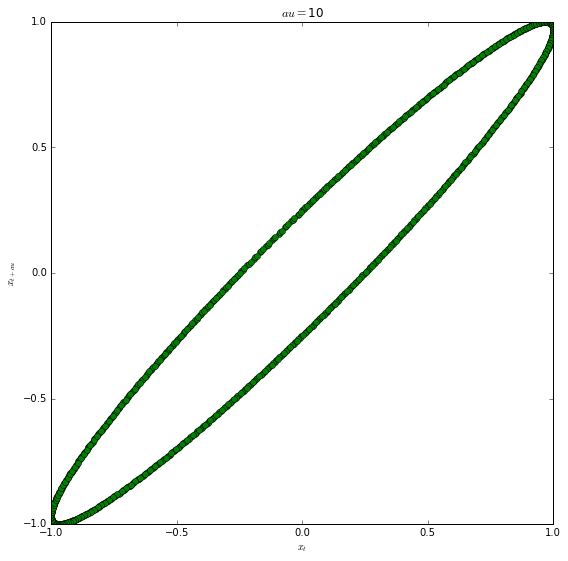

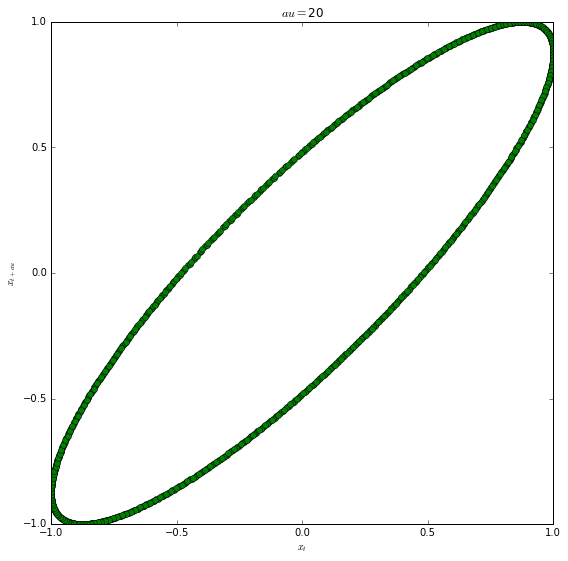

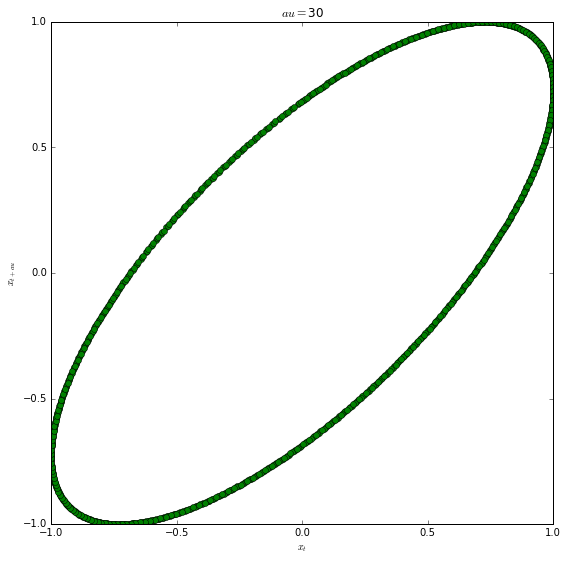

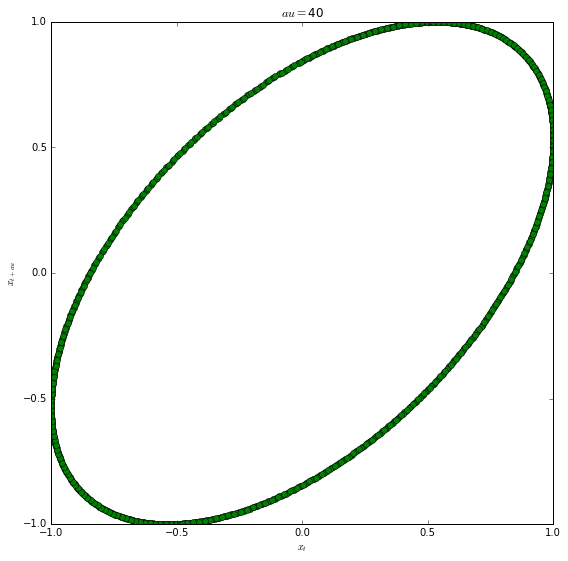

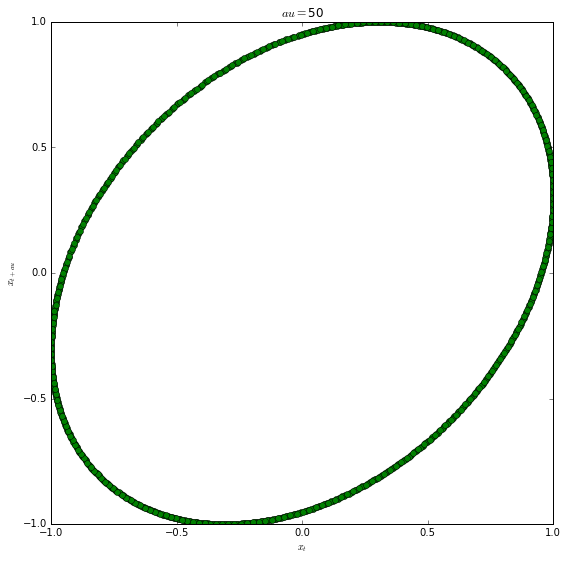

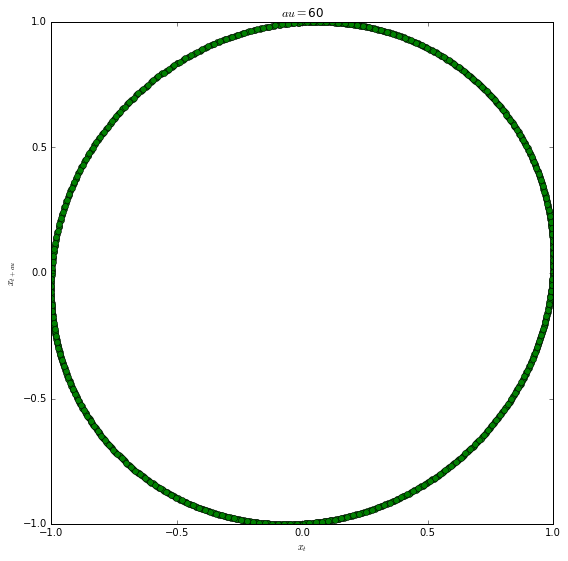

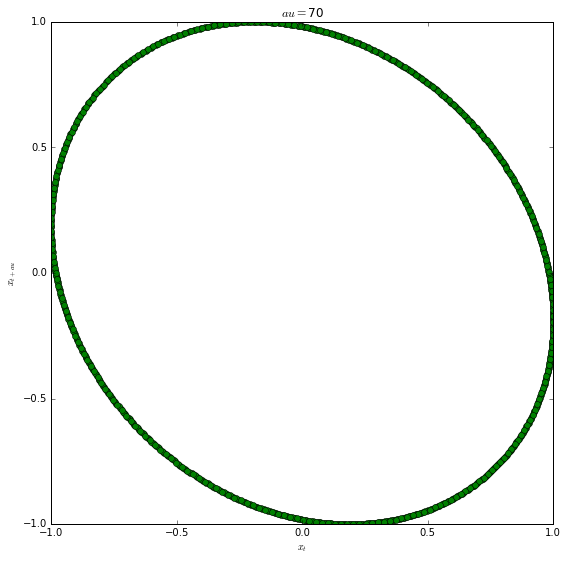

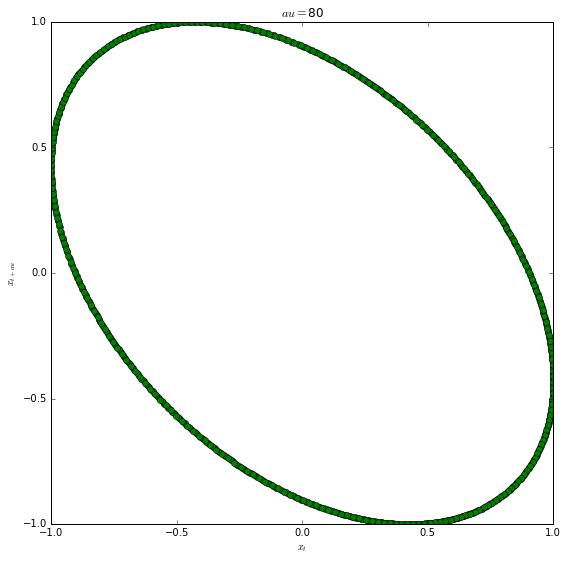

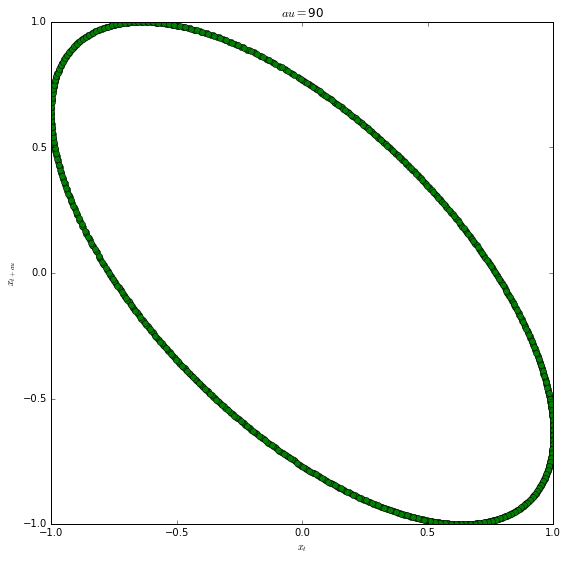

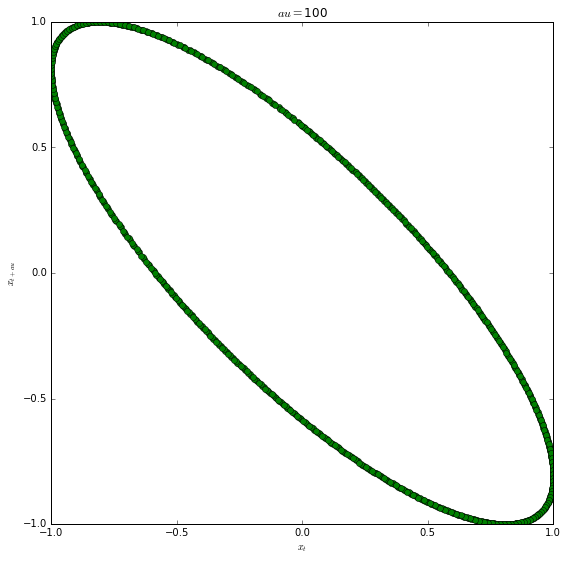

In [3]:
x = np.sin(np.linspace(0,8*np.pi, 1000))
for tau in (1,2,3,4,5,6,7,8,9,10):
    tau = tau*10
    fig, axes = plt.subplots(figsize=(9,9))
    axes.plot(x[:-tau], x[tau:], "go")
    axes.set_xlabel("$x_t$")
    axes.set_ylabel("$x_{t+\tau}$")
    axes.set_title("$\tau = ${}".format(tau))

Dla dużego tau pojawia się problem z topologią.

Trzeba pamiętać: równania dyfuzji, hydrodynamiki... mają równania cząstkowe. Elementy przestrzenne. Nie są **zwarte** przestrzennie. *Przypuszczam, że chodzi o to, że odwzorowania którymi się do tej pory zajmowaliśmy były ograniczone np. do przedziału $0 < x < 1$.*

### Przykłady podwajania okresu.

Przykład: obwód RLC z diodą waraktorową, która spełnia równanie

$$V(q) = (1 + V(q)/0.6)^{0.43} q/C_0$$

Podpinamy równanie oscylatora tłumionego (ruchu ładunku w obwodzie lub prądu w cewce - indukcyjność robi za masę), z harmonicznym zasilaniem\wymuszaniem\prawą stroną równania (*pobudzanie periodyczne*).

Przekrój Poincare - wyświetlenie trajektorii fazowej, jakoś wijącej się w przestrzeni, i wstawienie w poprzek trajektorii płaszczyzny. Często nietrywialna trygonometria. Ale jeśli siła zewnętrzna jest harmoniczna, a przez Fouriera każda prędzej czy później jest, to można zagrać tak:

Obserwujemy natężenie prądu w obwodzie, sprawdzamy je co okres i wykreślamy
$$I(t+T) = f(I(t))$$
Jest to **przekrój stroboskopowy**. Analog przekroju Poincare dla układów okresowych (łatwiejszy do zrobienia, nie wykluczają się).

<img src="dun6r1.png" width="300">

W tym problemie dostajemy gładkie maksimum - unimodalne! Więc to powinno mieć cechy odwzorowania logistycznego, ale przez to że poza maksimum krzywa jest nieparaboliczna to będzie trochę zniekształcone.

Zmieniając amplitudę, obserwujemy najpierw 1 peak, potem dwa + subharmoniczne... Podwajanie okresu - scenariusz Feigenbauma chaosu!

<img src="dun6r2.png" width = "300">

W eksperymencie ciężko pokazać więcej niż 3 "piętra" podwajania okresu przez szumy

In [4]:
# Rozwiązanie równania diody waraktorowej

### Chaos a medycyna
Demografia, konkretnie epidemie - komary, kleszcze (okresowo! mało\dużo\mało\dużo)

Występowanie odry, świnki, ospy (skończyły się w '60... taa.)

Szereg czasowy: okresowe występowanie chorób

Widmo mocy - wykładnicze opadanie + peaki coś a la podwajanie

Rekonstrukcja przez Takensa (zdjęcia z oscyloskopu!)

Trajektoria fazowa jak ruch po stożku w NY, w Baltimore odzi bardzo podobnie!

<img src="dun6r3.png" width = "300">

Machnęli przekrój Poincare -> dyskretne odwzorowanie. i jak popatrzeć na model SEIR to wychodzi taki sam stożek...

Odwzorowanie May'a (jak Karol May) - logistyczne, tylko  $x_n \exp{(-x_n)}$

Z kiepskich danych wychodzi dobry fit:

<img src="dun6r4.png" width = "600">

Ale dla ospy wietrznej wychodzi już zupełnie inna topologia! Stąd wniosek, że ospa wietrzna rozprzestrzenia się całkowicie inaczej niż odra!



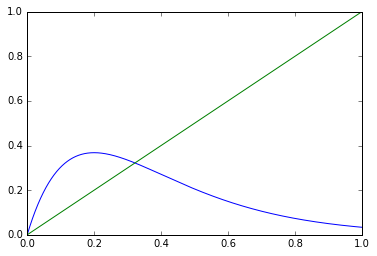

In [5]:
#Odwzorowanie Maya

x = np.linspace(0, 1, 1000)
r = 5
y = r*x*np.exp(-x*r)
plt.plot(x,y)
plt.plot(x,x)

### Moje pytanie: podwajanie okresu

Każda składowa dostaje klona o dwukrotnej częstotliwości $f' = 2f$. A wtedy każda z tych składowych dostaje swoje harmoniczne na całkowitych wielokrotnośiciach. Toteż: każda składowa klonuje się w LEWO, a innym procesem (rozkład na harmoniczne) każdy klon klonuje się przy narodzeniu w PRAWO.

**(rysunek 5)**


### Funkcja pseudookresowa
Wraca PRAWIE w to samo miejsce po full okresie. Precesja Merkurego!

### Kawitacja akustyczna (slajd 16 w4)

### Reakcja Biełousowa - Żabotyńskiego (slajd 17 w4)

Biełousow na Uralu czy gdzieś w okolicy rozgryzł takie okresowe *oscylacyjne reakcje chemiczne*. Nie pasowało, niestety, do ideologii! Mamy reakcję chemiczną, nie szumimy, nie trzęsiemy, a ona działa nieprzewidywalnie! Nie uwierzyli mu. Opublikował w jakimś lokalnym pisemku. Żabotyński w końcu to przetłumaczył.

**youtube**

Rzędu 87 równań kinetyki wchodzi do takiego układu. Parametr kontrolny r - szybkość przepływu substancji. Dla małych r nic się nie dzieje i równowaga, dla
dużych r - reagenty nie reagują bo za szybko przepływają. Pośrednio - okresowe, chaotyczne trajektorie...

Mierzyli to z szeregu czasowego na elektrodzie czułej na jeden konkretny gatunek jonu. Dalsze elektrody by się zakłócały. Więc wzięli Takensa, empirycznie - 8.8s jako przesunięcie

### Moniki pytanie: rysowanie przekroju Poincare

**(notatki obok rys5)**
* Oprogramować hiperpowierzchnię
* Krzywe bierzemy zorientowane dodatnio
* Geometria
* Obejście problemu w układach okresowych: przekrój stroboskopowych

S19W4
* Mamy przekrój Poincare z Takensa???
* Robimy z niego odwzorowanie (jako dyskretne punkty)
* Interpolujemy do odwzorowania krzywą przez sklejane spline'y
* Bawimy się parametrami... w pewnym momencie dostajemy ten sam szereg czasowy



> Fale w mchu na kamieniach w Finlandii

Pierścień mchu. Kamień wyjałowiony za pierścieniem, a potem na zewnątrz pierścienia rośnie kolejny pierścień. Ten sam mechanizm co wcześniej, tylko do mchu.

> Pleśń też...

### Coming soon: intermitencja
* "To cease temporarily, interrupt"
* Przepływy turbulentne występujące obok przepływów laminarnych (przestrzennie)
* Idą sobie trąby powietrzne, ładnie, uprzejmie, po kolei. Kolejka powstaje.

Nas interesuje intermitencja w dziedzinie czasu. **Doświadczenie Rayleigha-Benarda**.

>CAŁA GAMMA ZACHOWAN

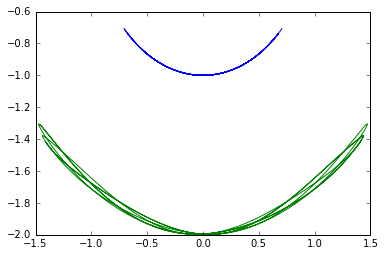

In [9]:
# Wahadło podwójne
# bo dawno się nim nie bawiłem
# in production
g=9.81
L=1
m=1
def time_derivative(r):
    #x, y, px, py = theta1, theta2, p1, p2 = r
    x, y, px, py = r
    x_dt = (6/m/L**2)*(2*px-3*py*np.cos(x-y))/(16-9*np.cos(x-y)**2)
    y_dt = (6/m/L**2)*(8*py-3*np.cos(x-y)*px)/(16-np.cos(x-y)**2)
    px_dt = -0.5*m*L**2*(x_dt*y_dt*np.sin(x-y)+3*g*np.sin(x)/L)
    py_dt = -0.5*m*L**2*(-x_dt*y_dt*np.sin(x-y)+g/L*np.sin(y))
    return np.array([x_dt, y_dt, px_dt, py_dt])

def RK4_step(r, dt, f=time_derivative):
    k1 = f(r)
    k2 = f(r+k1*dt/2)
    k3 = f(r+k2*dt/2)
    k4 = f(r+k3*dt)
    return r + dt/6*(k1+2*(k2+k3)+k4)

def AnglesToCartesians(theta1, theta2):
    x1 = L*np.sin(theta1)
    y1 = -L*np.cos(theta1)
    x2 = x1 + L*np.sin(theta2)
    y2 = y1 - L*np.cos(theta2)
    return np.array([x1, y1, x2, y2])
NT = 1000
dt = 0.01
r_history = np.zeros((NT,4))
r = r_history[0] = np.array([np.pi/4, np.pi/4, 0, 0])

for i in range(1,NT):
    r_history[i] = RK4_step(r_history[i-1], dt)

theta1, theta2, ptheta1, ptheta2 = r_history.T
x1, y1, x2, y2 = AnglesToCartesians(theta1, theta2)
plt.plot(x1, y1)
plt.plot(x2, y2)